In [ ]:
# Matt Garlock
# Predicting Energy Output Project
# 12/12/24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   HOUR         68778 non-null  int32         
 8   DAY          68778 non-null  int32         
 9   MONTH        68778 non-null  int32         
 10  YEAR         68778 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(4), int64(1), object(1)
memory usage: 4.7+ MB
None
                           DATE_TIME   PLANT_ID      DC_POWER      AC_POWER  \
count                          68778    68778.0  68778.000000  68778.000000   


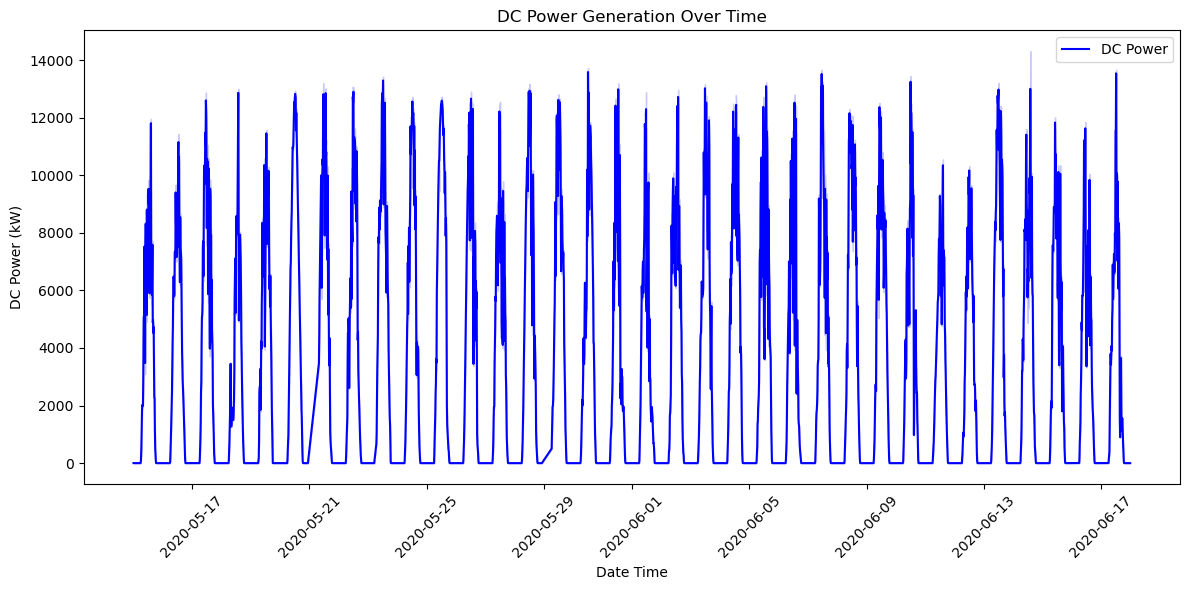

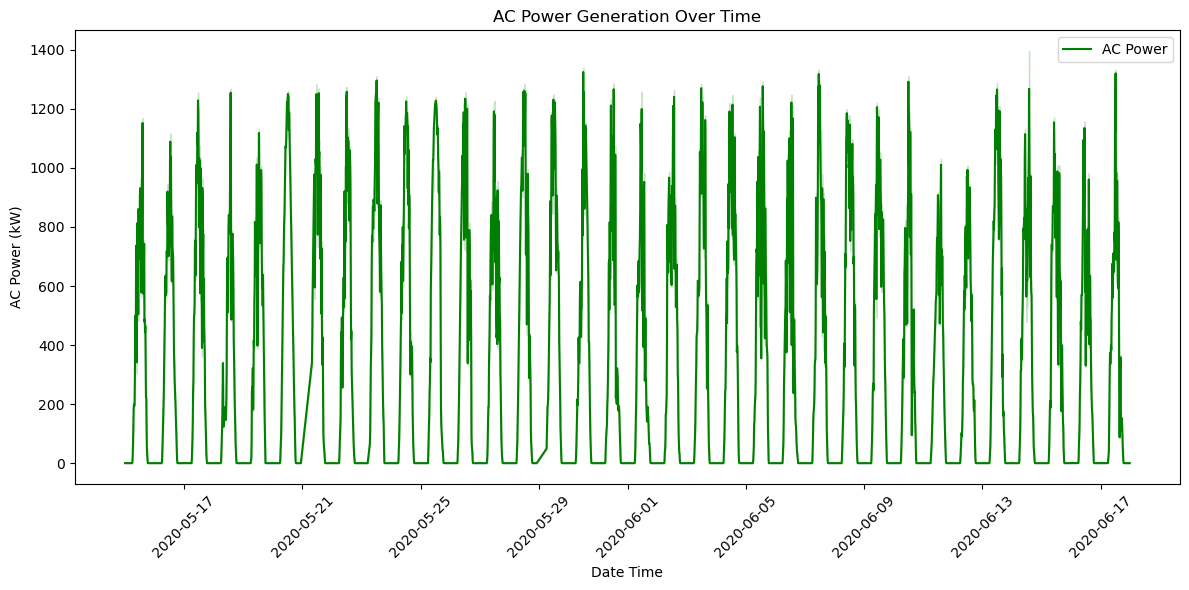

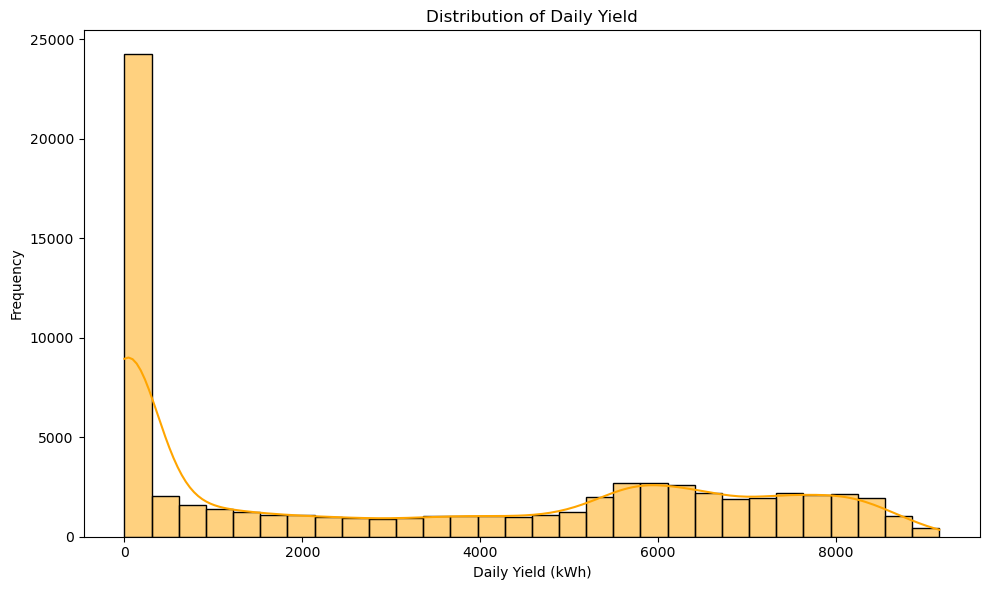

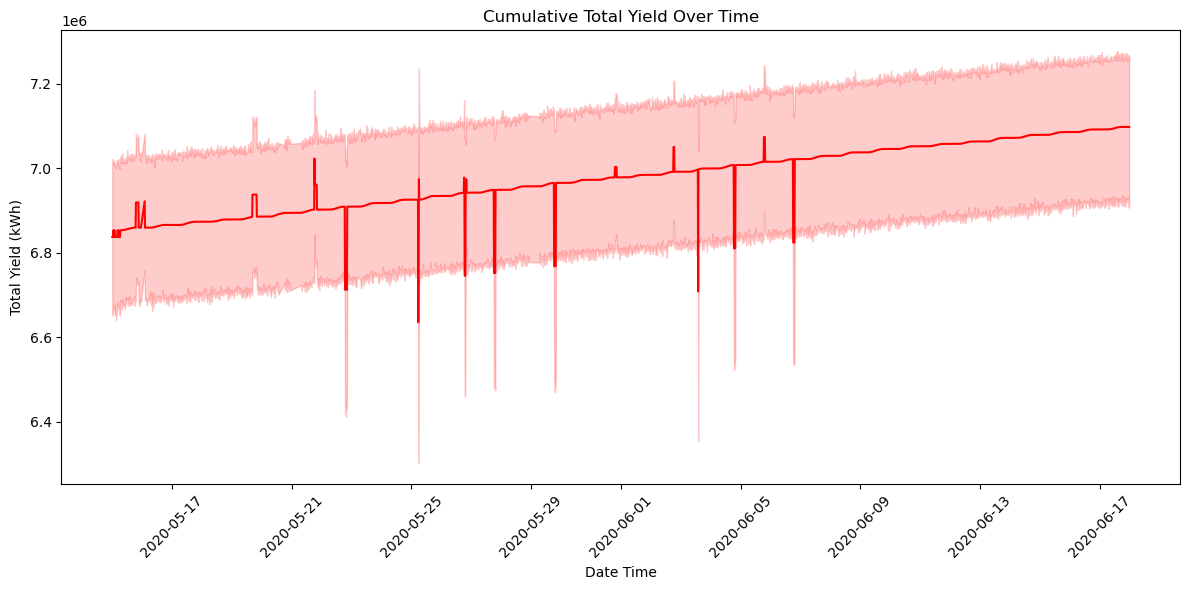

RMSE: 11.895959635313124
R^2 Score: 0.999991255894249


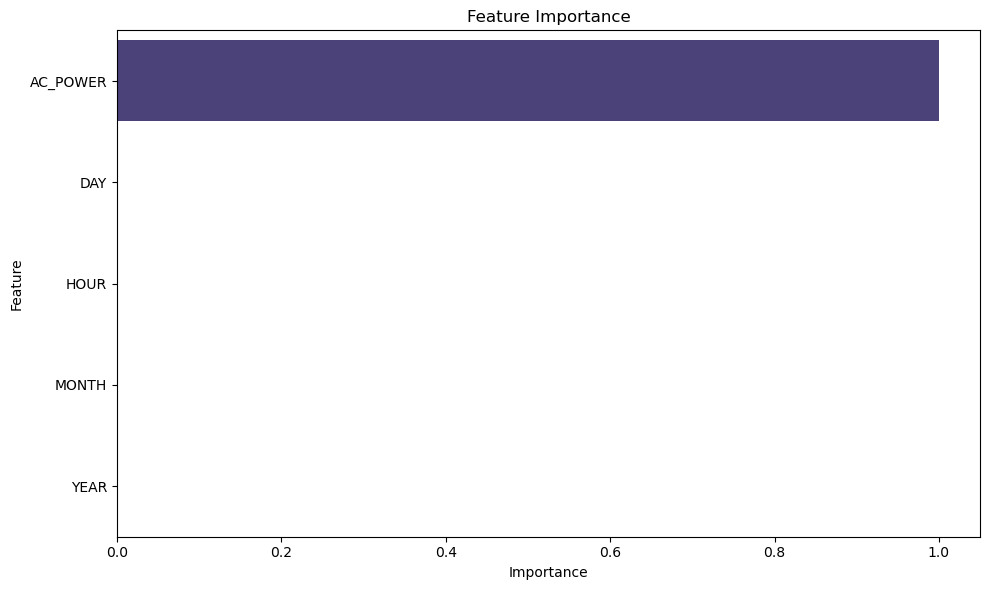

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
file_path = '/Users/mattgarlock/Downloads/Plant_1_Generation_Data.csv'
df = pd.read_csv(file_path)

# Convert DATE_TIME to datetime
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Extract additional time-based features
df['HOUR'] = df['DATE_TIME'].dt.hour
df['DAY'] = df['DATE_TIME'].dt.day
df['MONTH'] = df['DATE_TIME'].dt.month
df['YEAR'] = df['DATE_TIME'].dt.year

# Exploratory Data Analysis: Basic Info
print(df.info())
print(df.describe())

# Visualization 1: DC Power over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE_TIME', y='DC_POWER', label='DC Power', color='blue')
plt.title('DC Power Generation Over Time')
plt.xlabel('Date Time')
plt.ylabel('DC Power (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("DSC680Viz1.png")
plt.show()


# Visualization 2: AC Power over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE_TIME', y='AC_POWER', label='AC Power', color='green')
plt.title('AC Power Generation Over Time')
plt.xlabel('Date Time')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("DSC680Viz2.png")
plt.show()


# Visualization 3: Daily Yield Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DAILY_YIELD', bins=30, kde=True, color='orange')
plt.title('Distribution of Daily Yield')
plt.xlabel('Daily Yield (kWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("DSC680Viz3.png")
plt.show()


# Visualization 4: Total Yield Growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE_TIME', y='TOTAL_YIELD', color='red')
plt.title('Cumulative Total Yield Over Time')
plt.xlabel('Date Time')
plt.ylabel('Total Yield (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("DSC680Viz4.png")
plt.show()


# Prepare data for modeling
features = ['HOUR', 'DAY', 'MONTH', 'YEAR', 'AC_POWER']
target = 'DC_POWER'

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

# Feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


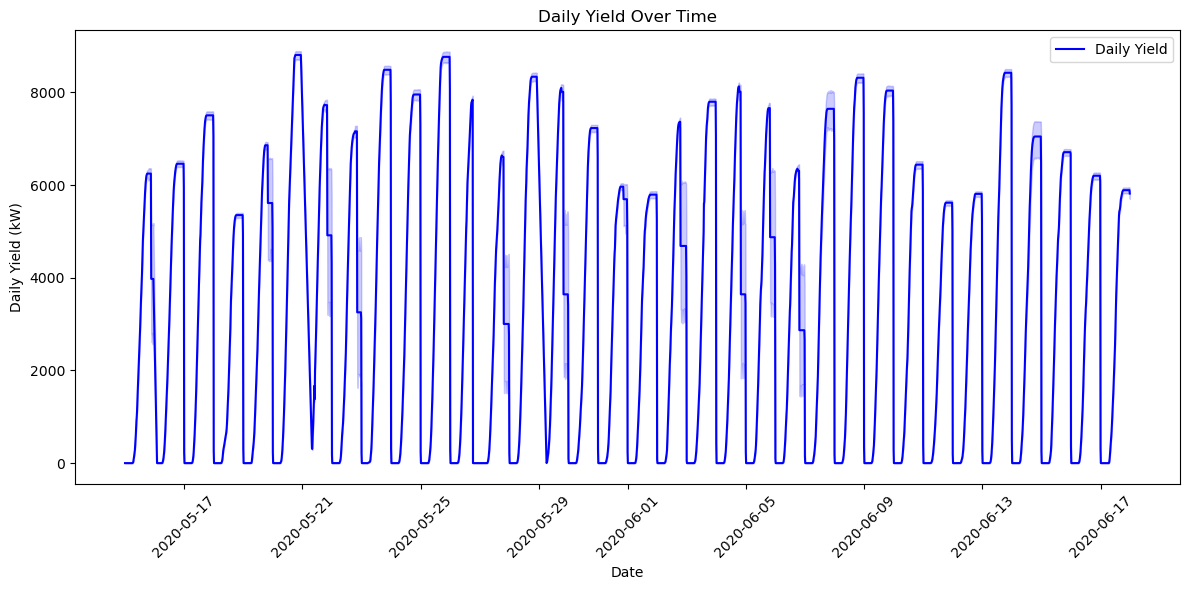

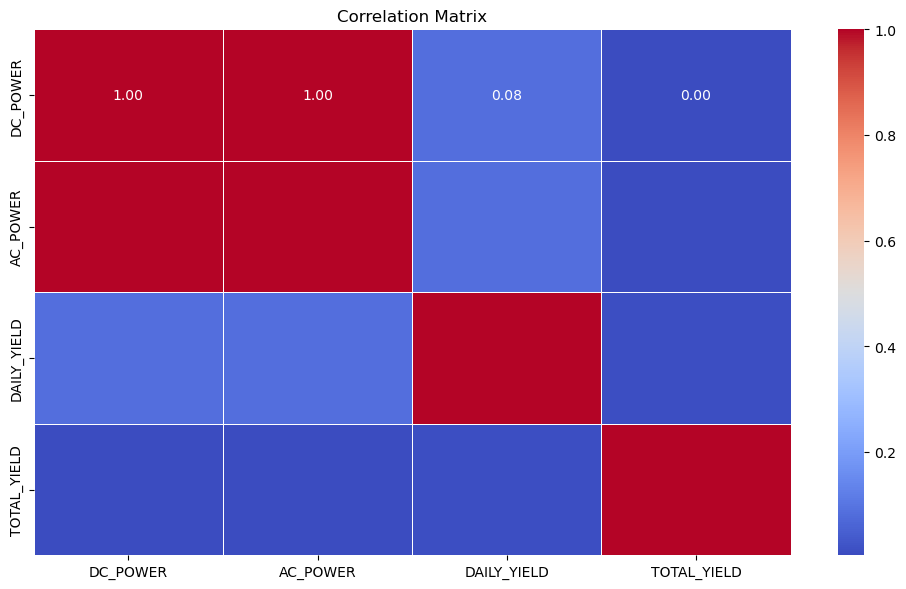

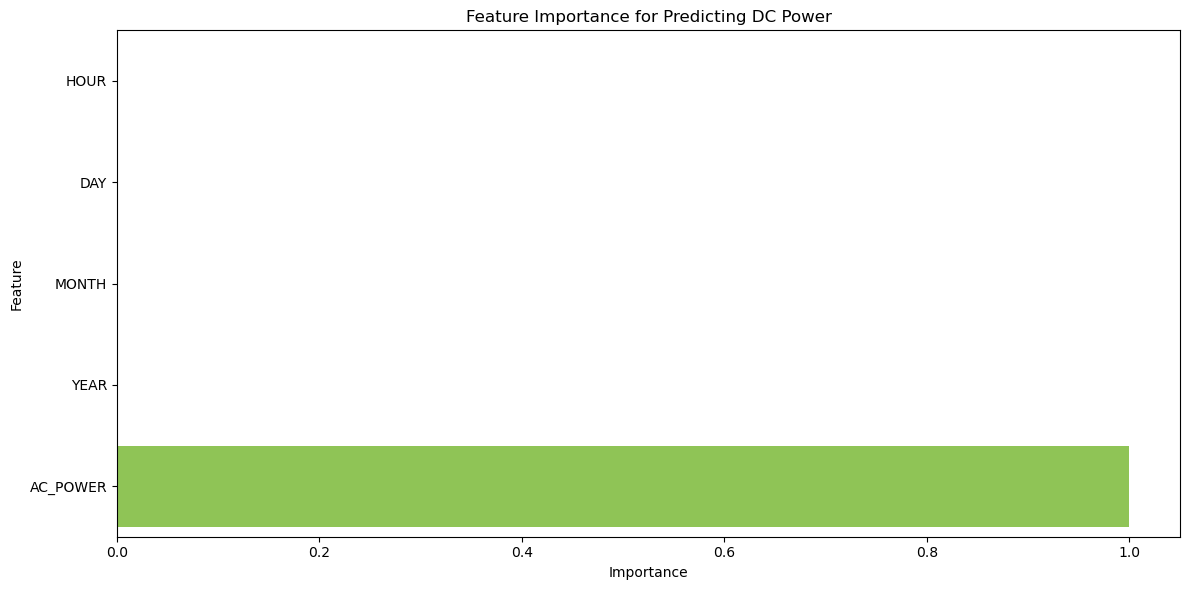

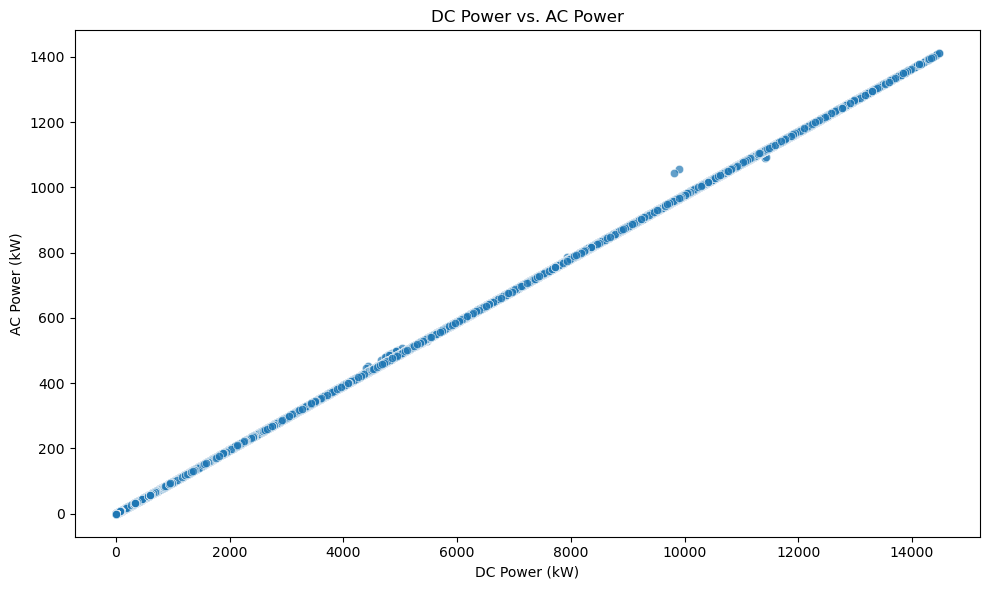

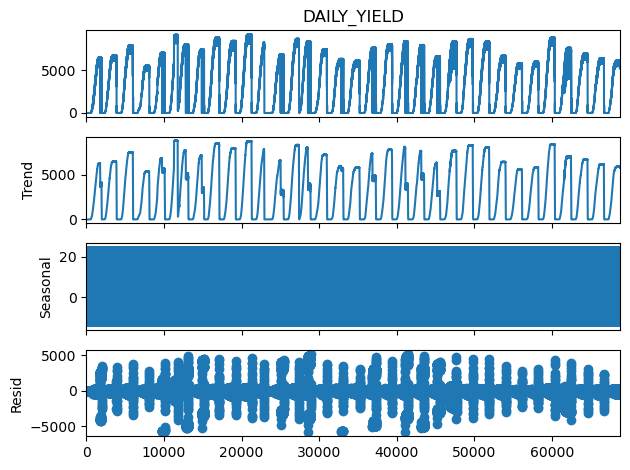

In [4]:
# Visualization 1: Daily Trends in DC Power Generation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE_TIME', y='DAILY_YIELD', label='Daily Yield', color='blue')
plt.title('Daily Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Yield (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Daily_Yield_Trend.png")
plt.show()

# Visualization 2: Correlation Matrix Heatmap
correlation = df[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("Correlation_Matrix.png")
plt.show()

# Visualization 3: Feature Importance (if using a tree-based model)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance for Predicting DC Power")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("Feature_Importance.png")
plt.show()

# Visualization 4: Scatterplot of DC Power vs. AC Power
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DC_POWER', y='AC_POWER', alpha=0.7)
plt.title("DC Power vs. AC Power")
plt.xlabel("DC Power (kW)")
plt.ylabel("AC Power (kW)")
plt.tight_layout()
plt.savefig("DC_vs_AC_Power.png")
plt.show()

# Visualization 5: Time Series Decomposition (optional if you do time-based analysis)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['DAILY_YIELD'], model='additive', period=24)
result.plot()
plt.tight_layout()
plt.savefig("Time_Series_Decomposition.png")
plt.show()


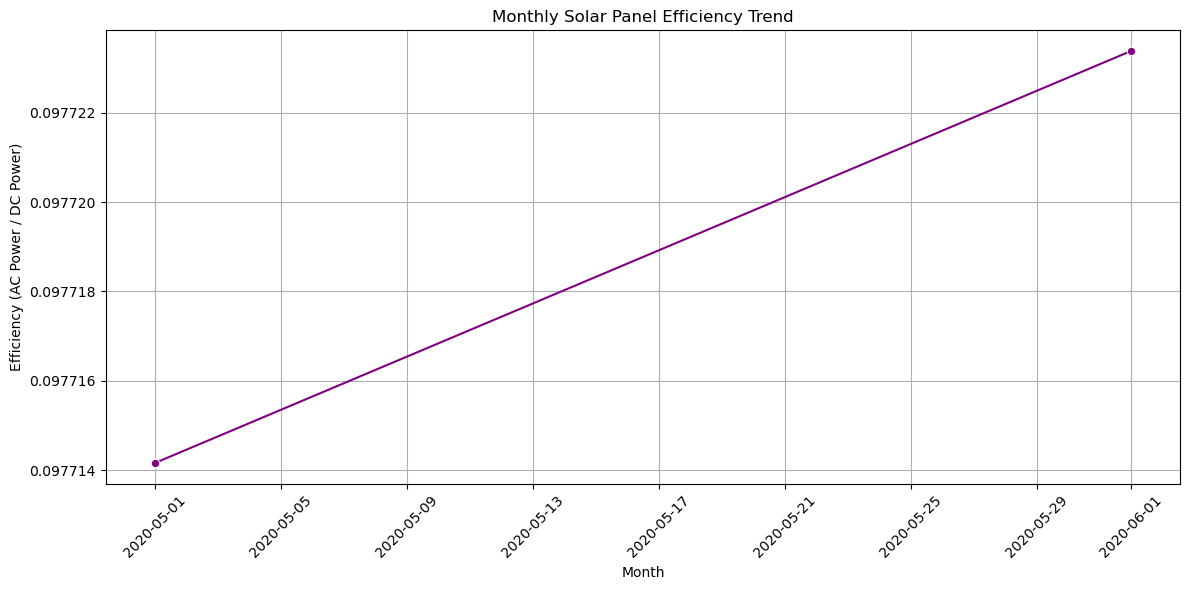

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the month from the DATE_TIME column
df['MONTH'] = df['DATE_TIME'].dt.to_period('M')

# Group by month and calculate the mean efficiency
df['EFFICIENCY'] = (df['AC_POWER'] / df['DC_POWER']).replace([float('inf'), -float('inf')], 0)
monthly_efficiency = df.groupby('MONTH')['EFFICIENCY'].mean().reset_index()

# Convert MONTH back to datetime for plotting
monthly_efficiency['MONTH'] = monthly_efficiency['MONTH'].dt.to_timestamp()

# Plot the monthly efficiency trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_efficiency, x='MONTH', y='EFFICIENCY', marker='o', color='purple')
plt.title('Monthly Solar Panel Efficiency Trend')
plt.xlabel('Month')
plt.ylabel('Efficiency (AC Power / DC Power)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("Monthly_Efficiency_Trend.png")
plt.show()
